In [58]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [59]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

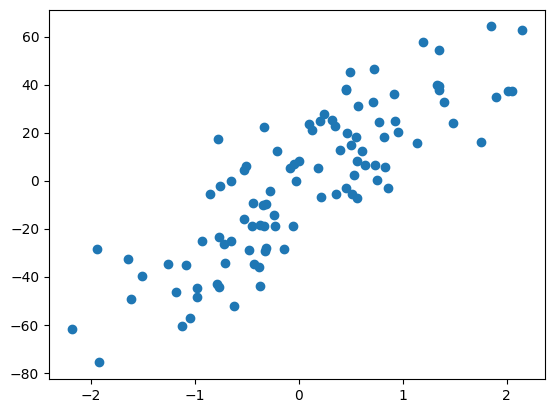

In [60]:
plt.scatter(x,y)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=lr.predict(x_test)
y_pred

array([ 19.5659327 , -24.15701114,  12.2661236 ,  22.05599586,
        29.36403591,  12.25019066, -28.34191112,  10.94487792,
        51.81733533, -22.46128469, -47.04418285,  16.59925013,
        17.46526725, -37.4175765 ,   6.43583226,   3.41598838,
        11.43530192, -29.86215888,   2.59745143,  17.79599227,
        33.70708458, -17.50331785, -12.28267282, -10.63557294,
        -7.01579398,   9.27908308, -44.25934957,  47.30747276,
       -14.76838803,  16.29996207])

In [64]:
print(lr.coef_)
print(lr.intercept_)

[27.23211145]
-3.061382783446778


In [65]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.1)
rr.fit(x_train,y_train)
print(rr.coef_)
print(rr.intercept_)

[27.18755437]
-3.0608601304322423


In [66]:
from sklearn.linear_model import Ridge
rr1=Ridge(alpha=10)
rr1.fit(x_train,y_train)
print(rr1.coef_)
print(rr1.intercept_)

[23.39753987]
-3.016403398457559


In [67]:
from sklearn.linear_model import Ridge
rr2=Ridge(alpha=100)
rr2.fit(x_train,y_train)
print(rr2.coef_)
print(rr2.intercept_)

[10.31957914]
-2.8629993953820243


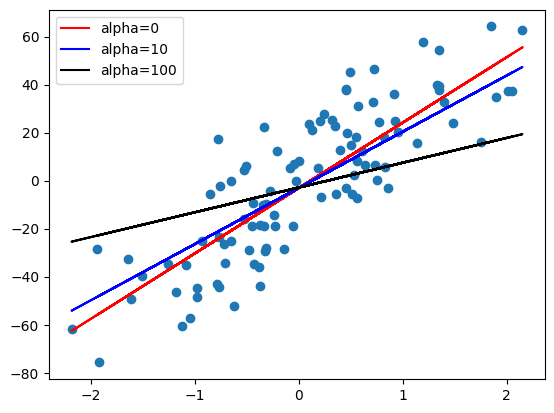

In [68]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label="alpha=0")
# plt.plot(x,rr.predict(x),color='green',label="alpha=0.1")
plt.plot(x,rr1.predict(x),color='blue',label="alpha=10")
plt.plot(x,rr2.predict(x),color='black',label="alpha=100")
plt.legend()

In [69]:
class MeraRidge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
    
    def fit(self,x_train,y_train):
        num=0
        den=0

        for i in range(x_train.shape[0]):
            num=num+((y_train[i]-y_train.mean())*(x_train[i]-x_train.mean()))
            den=den+((x_train[i]-x_train.mean())**2)

        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-(self.m * x_train.mean())
        print(self.m,self.b)

    def predict(self,x_test):
        y_pred=(self.m*x_test)+self.b
        return y_pred

In [70]:
mr=MeraRidge()

In [71]:
mr.fit(x_train,y_train)

[27.18755437] [-3.06086013]


In [72]:
mr.predict(x_test)

array([[ 19.52943261],
       [-24.1219719 ],
       [ 12.24156744],
       [ 22.01542154],
       [ 29.3115042 ],
       [ 12.22566057],
       [-28.30002455],
       [ 10.92248358],
       [ 51.72806561],
       [-22.42901998],
       [-46.97169569],
       [ 16.56760412],
       [ 17.43220427],
       [-37.36084036],
       [  6.4208156 ],
       [  3.40591278],
       [ 11.41210515],
       [-29.81778489],
       [  2.58871512],
       [ 17.76238816],
       [ 33.6474468 ],
       [-17.47916536],
       [-12.26706232],
       [-10.62265742],
       [ -7.00880113],
       [  9.2594143 ],
       [-44.19141895],
       [ 47.22558207],
       [-14.74871042],
       [ 16.26880576]])